# Geographically weighted regression

### Libraries

In [228]:
# rm(list=ls())

In [268]:
library(spdep)
library(rgdal)
library(maptools)
library(sp)
library(RColorBrewer)
library(classInt)
library(GISTools)
library(maps)
library(spgwr)
library(factoextra)
library(NbClust)

options(warn = -1)

OGR data source with driver: ESRI Shapefile 
Source: "C:\Users\Michal_schudnij\Desktop\Spatial_eco\repo\codes", layer: "df_warszawa"
with 938 features
It has 49 fields
Integer64 fields read as strings:  inpost_poi 


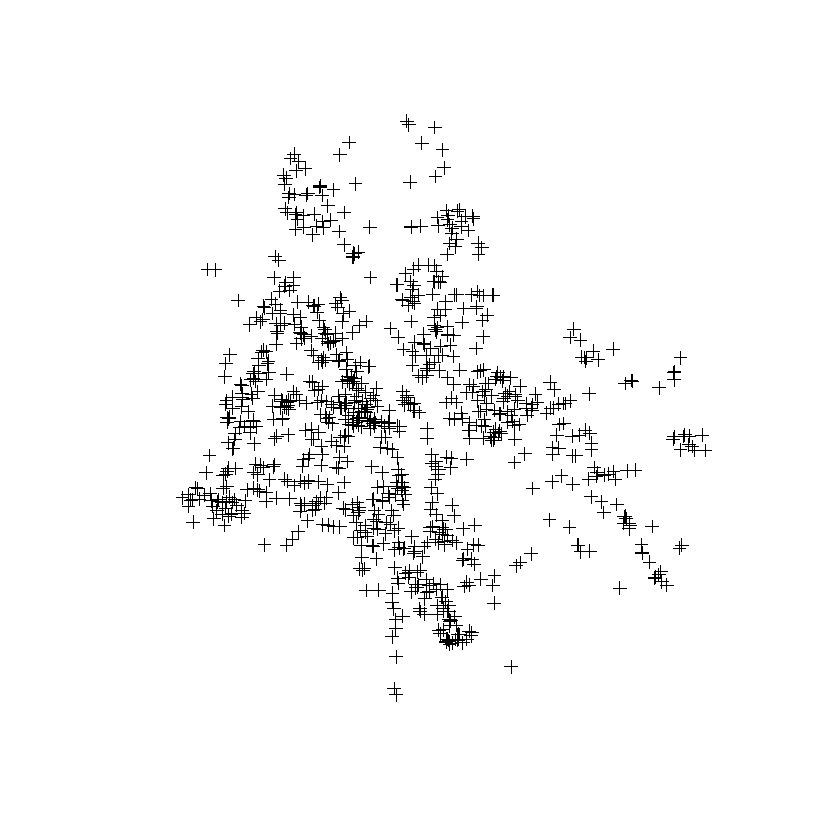

In [269]:
df_points_Warszawa<-readOGR(".", "df_warszawa")
plot(df_points_Warszawa)
crds<-coordinates(df_points_Warszawa)

In [270]:
names(df_points_Warszawa)[3] <- 'inpost'
names(df_points_Warszawa)[4] <- 'poczta'
names(df_points_Warszawa)[5] <- 'dhl'
names(df_points_Warszawa)[6] <- 'ruch'
names(df_points_Warszawa)[7] <- 'dpd'
names(df_points_Warszawa)[8] <- 'ups'
names(df_points_Warszawa)[22] <- 'fem_ratio'
names(df_points_Warszawa)[36] <- 'tot_log'
names(df_points_Warszawa)[44] <- 'male_65_log'

In [271]:
df_Warszawa <- as.data.frame(df_points_Warszawa)
df_Warszawa$inpost <- as.numeric(df_Warszawa$inpost)

In [272]:
names(df_Warszawa)

[1] "center"      "buffer"      "inpost"      "poczta"      "dhl"        
 [6] "ruch"        "dpd"         "ups"         "fedex_poin"  "TOT"        
[11] "TOT_0_14"    "TOT_15_64"   "TOT_65__"    "TOT_MALE"    "TOT_FEM"    
[16] "MALE_0_14"   "MALE_15_64"  "MALE_65__"   "FEM_0_14"    "FEM_15_64"  
[21] "FEM_65__"    "fem_ratio"   "buildings"   "shops"       "parks"      
[26] "forests"     "schools"     "railways"    "cycleways"   "parkings"   
[31] "crossings"   "bus_stops"   "city"        "shops_bina"  "parks_bina" 
[36] "tot_log"     "TOT_0_14lo"  "TOT_15_64l"  "TOT_65__lo"  "TOT_MALElo" 
[41] "TOT_FEMlog"  "MALE_0_14l"  "MALE_15__1"  "male_65_log" "FEM_0_14lo" 
[46] "FEM_15_64l"  "FEM_65__lo"  "long"        "lat"         "coords.x1"  
[51] "coords.x2"

In [273]:
# equation
eq<-inpost ~ poczta + dhl + ruch +
  + ups + buildings + parks + forests + schools + railways + cycleways + parkings + 
  crossings + tot_log + male_65_log + fem_ratio

In [274]:
# optimum bandwidth
# bw<-ggwr.sel(eq, data=df, coords=crds, family=poisson(), longlat=TRUE)
# bw = 112

In [275]:
bw = 2.13064983950881

In [276]:
# GWR model # generalized geographically weighted regression
model.ggwr_Warszawa<-ggwr(eq, data=df_Warszawa, coords=crds, family=poisson(), longlat=TRUE, bandwidth=bw)
model.ggwr_Warszawa

Call:
ggwr(formula = eq, data = df_Warszawa, coords = crds, bandwidth = bw, 
    family = poisson(), longlat = TRUE)
Kernel function: gwr.Gauss 
Fixed bandwidth: 2.13065 
Summary of GWR coefficient estimates at data points:
                    Min.     1st Qu.      Median     3rd Qu.        Max.
X.Intercept. -6.03541193  0.58696671  1.01775735  1.88968282  6.08758361
poczta       -0.14059669 -0.01949759 -0.01345700  0.00183038  0.32110975
dhl          -0.32460642 -0.00411567  0.02168248  0.02921197  0.31043828
ruch         -0.23478535 -0.01181577  0.02927599  0.05804444  0.13358080
ups          -0.20552020 -0.01610673  0.01062994  0.08277379  0.67291126
buildings    -0.00897469 -0.00038220  0.00015489  0.00076862  0.02731592
parks        -0.72585484 -0.03294831 -0.01539696 -0.00130381  0.19738758
forests      -0.11176113 -0.00428895 -0.00042143  0.00371850  0.03131003
schools      -0.20316364 -0.00080382  0.00410301  0.01044005  0.13457427
railways     -0.12524574 -0.00255992 -0.000434

In [277]:
# library(ggmap)
# library(ggplot2)

In [278]:
# Lille <- get_map("Warszawa,Poland", zoom=12)


# p <- ggmap(Warszawa)
# p <- p + geom_point(data=d, aes(lat, lon))
# p

In [280]:
length(model.ggwr_Warszawa$SDF$tot_log)

[1] 938

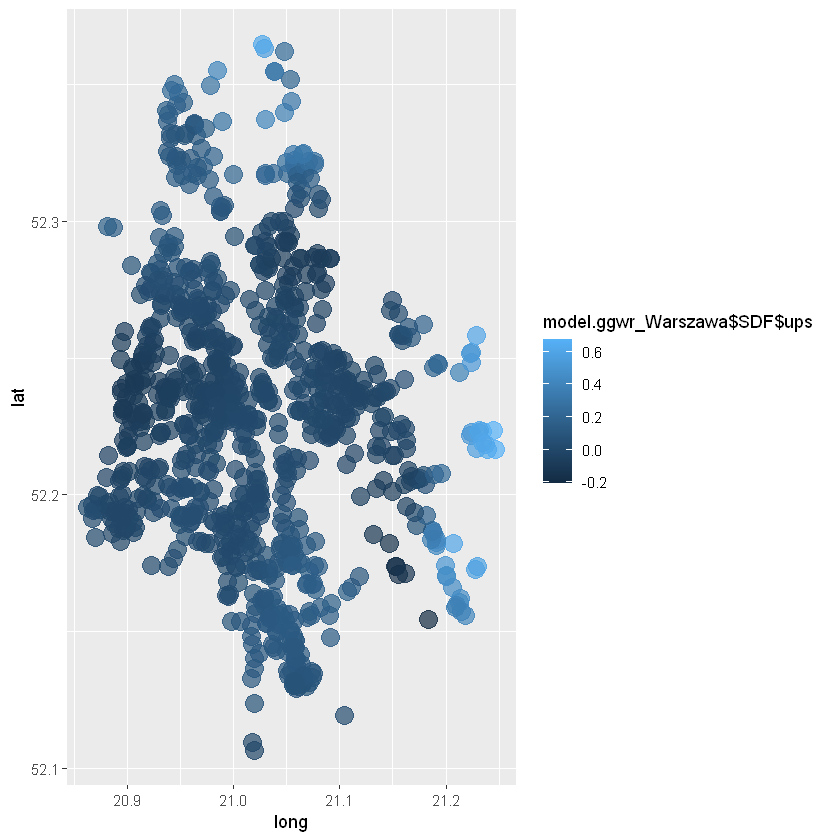

In [293]:
ggplot() + 
    geom_point(data=df_Warszawa, aes(long, lat, colour = model.ggwr_Warszawa$SDF$ups), size = 5, alpha = 0.7)

In [263]:
# ggplot(df_Warszawa, aes(long, lat))+

#   geom_point(aes(fill = inpost), color = "white")+
#   scale_fill_viridis_c(option = "C")+
#   theme_classic()

In [264]:
# ggplot() + geom_map(data = df_points_Warszawa, aes(map_id = center, fill = inpost), 
#     map = np_dist) + expand_limits(x = np_dist$long, y = np_dist$lat)

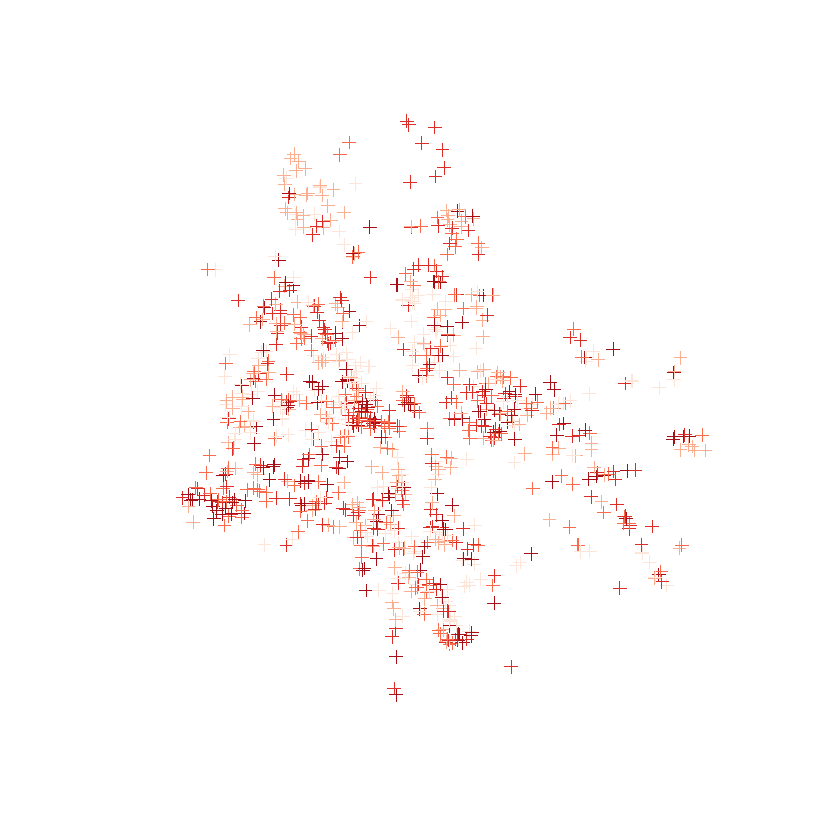

In [230]:
choropleth(df_points_Warszawa, model.ggwr_Warszawa$SDF$tot_log)

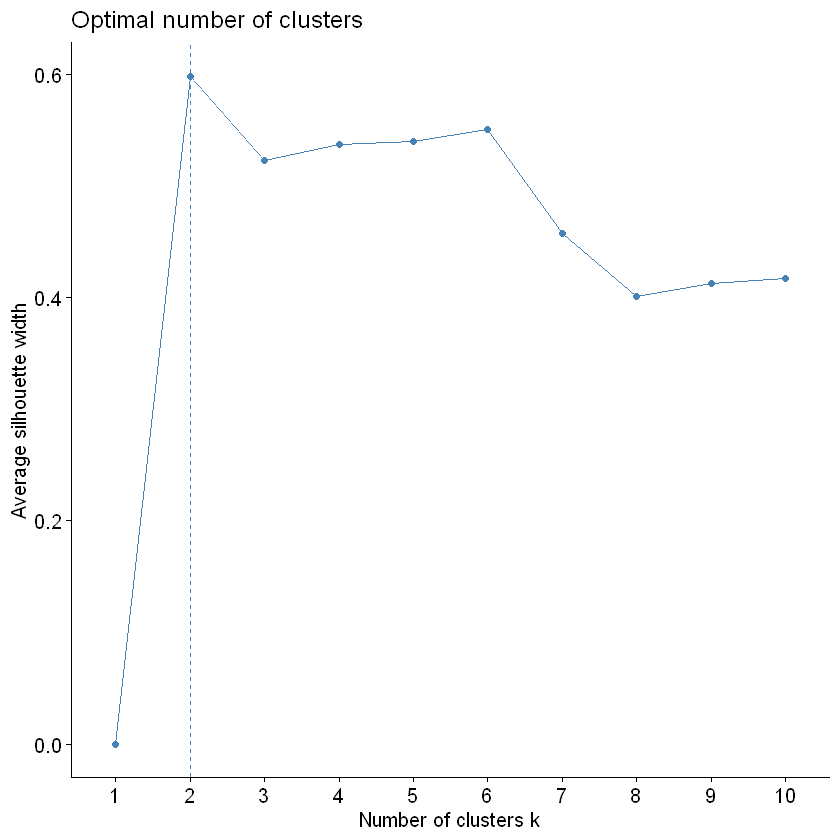

In [207]:
# clustering of GWR coefficients
fviz_nbclust(as.data.frame(model.ggwr$SDF[,2:16]), FUNcluster=kmeans)

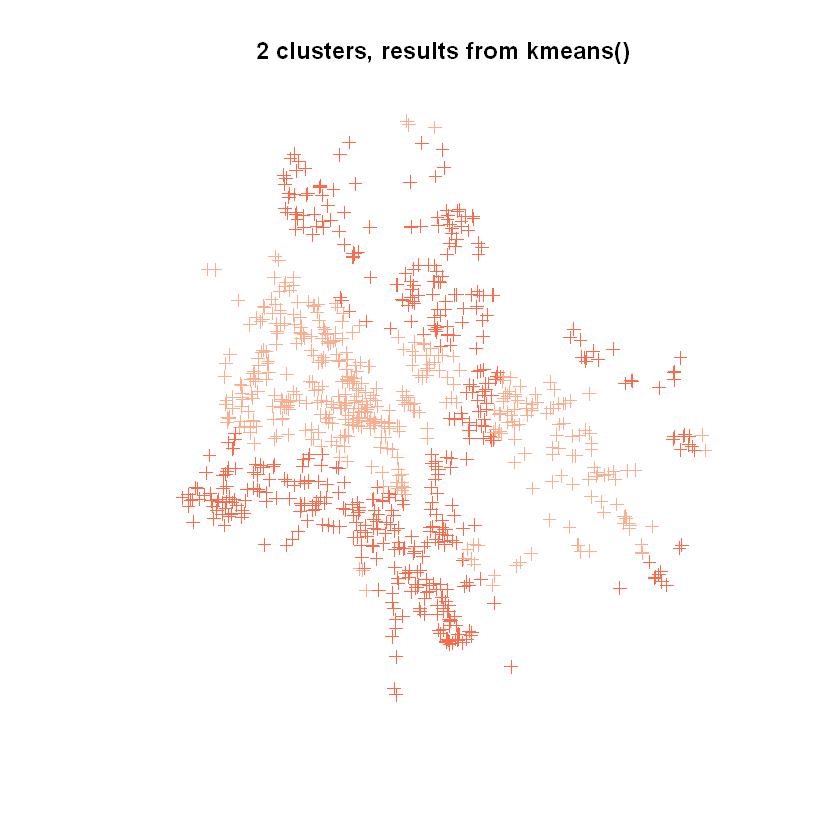

In [209]:
# clustering
clusters1<-kmeans(as.data.frame(model.ggwr_Warszawa$SDF[,2:16]), 2) 
choropleth(df_points_Warszawa, clusters1$cluster)
title(main="2 clusters, results from kmeans()")

In [210]:
df_Warszawa$clust1<-rep(0, times=dim(df_Warszawa)[1])
df_Warszawa$clust1[clusters1$cluster==1]<-1
df_Warszawa$clust2<-rep(0, times=dim(df_Warszawa)[1])
df_Warszawa$clust2[clusters1$cluster==2]<-1

In [211]:
eq1<-inpost ~ poczta + dhl + ruch + 
  + ups + buildings + parks + forests + schools + railways + cycleways + parkings + 
  crossings + tot_log + male_65_log + fem_ratio + clust1

In [212]:
# a-spatial linear model
model.ols_Warszawa<-lm(eq1, data=df_Warszawa)
summary(model.ols_Warszawa)


Call:
lm(formula = eq1, data = df_Warszawa)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.7263 -0.7771  0.6565  2.0261  6.9727 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.536651   2.049846  -1.725 0.084804 .  
poczta      -0.103367   0.074325  -1.391 0.164637    
dhl          0.121421   0.065984   1.840 0.066069 .  
ruch         0.342455   0.113381   3.020 0.002594 ** 
ups          0.262298   0.148829   1.762 0.078331 .  
buildings    0.004641   0.002566   1.809 0.070821 .  
parks       -0.069524   0.027336  -2.543 0.011142 *  
forests      0.006682   0.016105   0.415 0.678302    
schools      0.029443   0.026318   1.119 0.263557    
railways    -0.005180   0.006184  -0.838 0.402409    
cycleways   -0.031773   0.009471  -3.355 0.000827 ***
parkings    -0.002338   0.005190  -0.450 0.652498    
crossings    0.005226   0.004661   1.121 0.262460    
tot_log      1.323318   0.361968   3.656 0.000271 ***
male_65_log -0.162304   0.270153  -0

## Kraków

OGR data source with driver: ESRI Shapefile 
Source: "C:\Users\Michal_schudnij\Desktop\Spatial_eco\repo\codes", layer: "df_krakow"
with 388 features
It has 49 fields
Integer64 fields read as strings:  inpost_poi 


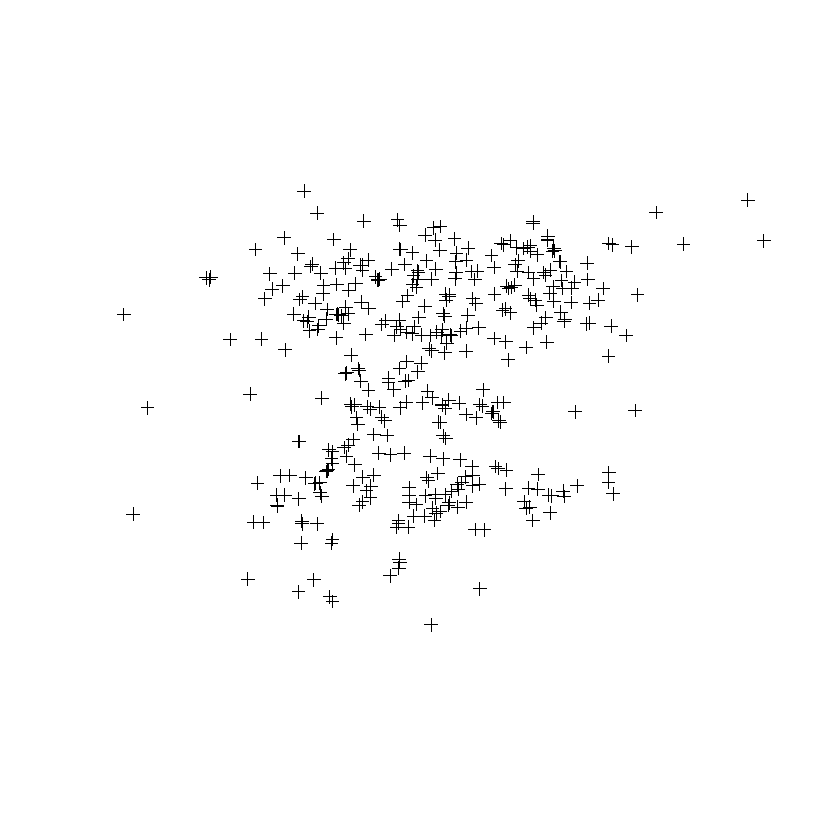

In [213]:
df_points_Krakow<-readOGR(".", "df_krakow")
plot(df_points_Krakow)
crds<-coordinates(df_points_Krakow)

In [214]:
names(df_points_Krakow)[3] <- 'inpost'
names(df_points_Krakow)[4] <- 'poczta'
names(df_points_Krakow)[5] <- 'dhl'
names(df_points_Krakow)[6] <- 'ruch'
names(df_points_Krakow)[7] <- 'dpd'
names(df_points_Krakow)[8] <- 'ups'
names(df_points_Krakow)[22] <- 'fem_ratio'
names(df_points_Krakow)[36] <- 'tot_log'
names(df_points_Krakow)[44] <- 'male_65_log'

In [215]:
df_Krakow <- as.data.frame(df_points_Krakow)
df_Krakow$inpost <- as.numeric(df_Krakow$inpost)

In [216]:
names(df_Krakow)

[1] "center"      "buffer"      "inpost"      "poczta"      "dhl"        
 [6] "ruch"        "dpd"         "ups"         "fedex_poin"  "TOT"        
[11] "TOT_0_14"    "TOT_15_64"   "TOT_65__"    "TOT_MALE"    "TOT_FEM"    
[16] "MALE_0_14"   "MALE_15_64"  "MALE_65__"   "FEM_0_14"    "FEM_15_64"  
[21] "FEM_65__"    "fem_ratio"   "buildings"   "shops"       "parks"      
[26] "forests"     "schools"     "railways"    "cycleways"   "parkings"   
[31] "crossings"   "bus_stops"   "city"        "shops_bina"  "parks_bina" 
[36] "tot_log"     "TOT_0_14lo"  "TOT_15_64l"  "TOT_65__lo"  "TOT_MALElo" 
[41] "TOT_FEMlog"  "MALE_0_14l"  "MALE_15__1"  "male_65_log" "FEM_0_14lo" 
[46] "FEM_15_64l"  "FEM_65__lo"  "long"        "lat"         "coords.x1"  
[51] "coords.x2"

In [217]:
# equation
eq<-inpost ~ poczta + dpd + ruch +
  + ups + buildings + parks + forests + schools + railways + cycleways + parkings + 
  crossings + tot_log + male_65_log + fem_ratio

In [218]:
# # optimum bandwidth
# bw<-ggwr.sel(eq, data=df_Krakow, coords=crds, family=poisson(), longlat=TRUE)

In [219]:
bw_Krakow = 1.16456334227987

In [221]:
# GWR model # generalized geographically weighted regression
model.ggwr_Krakow<-ggwr(eq, data=df_Krakow, coords=crds, family=poisson(), longlat=TRUE, bandwidth=bw_Krakow)
model.ggwr_Krakow

ERROR: Error in ggwr(eq, data = df_Krakow, coords = crds, family = poisson(), : nie znaleziono obiektu 'bw_Krakow'


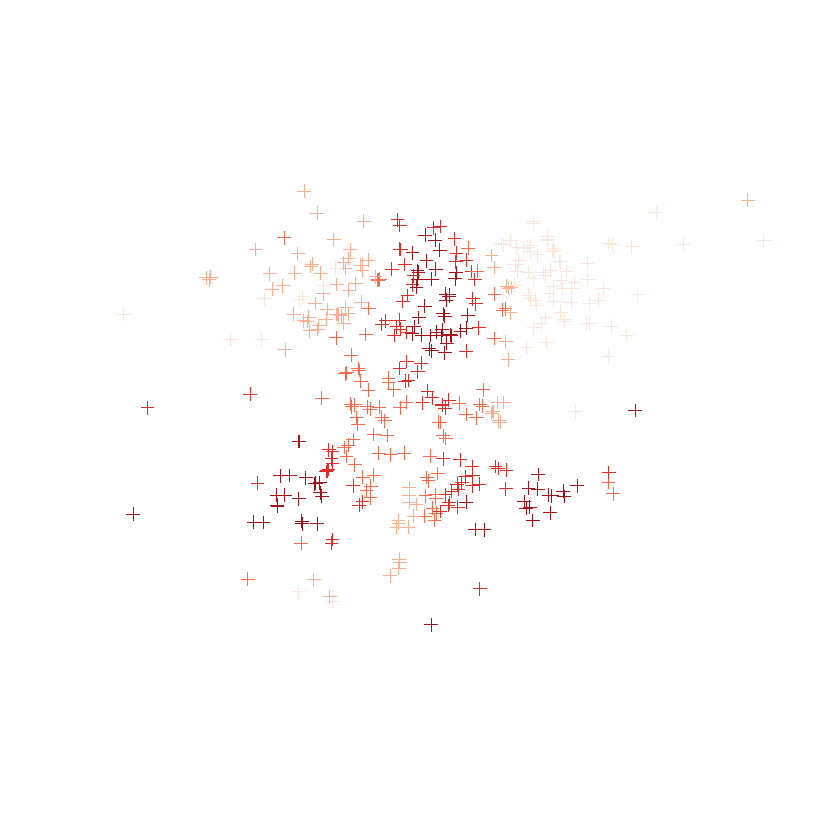

In [222]:
choropleth(df_points_Krakow, model.ggwr$SDF$poczta)

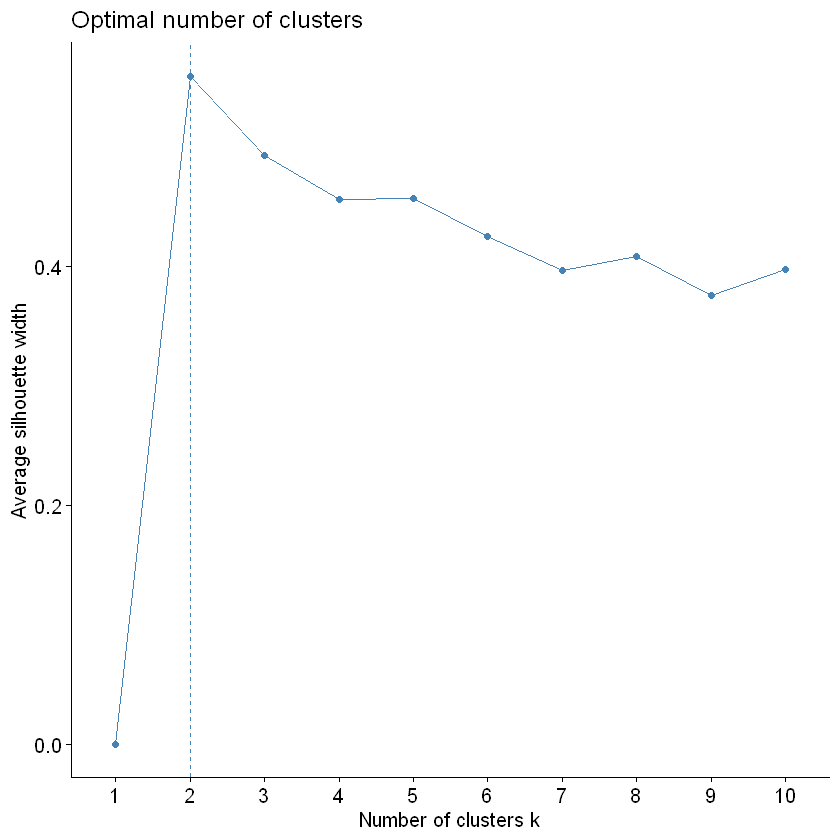

In [223]:
# clustering of GWR coefficients
fviz_nbclust(as.data.frame(model.ggwr$SDF[,2:16]), FUNcluster=kmeans)

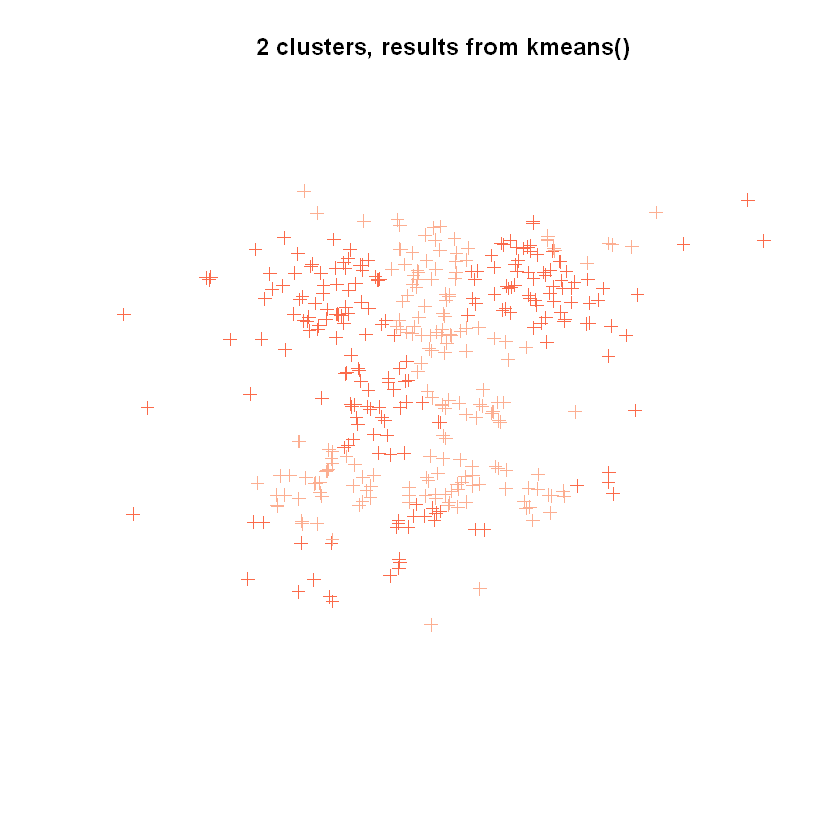

In [224]:
# clustering - approach 1 – stats:: package
# kmeans() command from the stats:: package gives the result in the kmeans class
clusters1<-kmeans(as.data.frame(model.ggwr$SDF[,2:16]), 2) 
choropleth(df_points_Krakow, clusters1$cluster)
title(main="2 clusters, results from kmeans()")


In [225]:
df_Krakow$clust1<-rep(0, times=dim(df_Krakow)[1])
df_Krakow$clust1[clusters1$cluster==1]<-1
df_Krakow$clust2<-rep(0, times=dim(df_Krakow)[1])
df_Krakow$clust2[clusters1$cluster==2]<-1

In [226]:
eq1<-inpost ~ poczta + dhl + ruch + 
  + ups + buildings + parks + forests + schools + railways + cycleways + parkings + 
  crossings + tot_log + male_65_log + fem_ratio + clust1

In [227]:
# a-spatial linear model
model.ols_Krakow<-lm(eq1, data=df_Krakow)
summary(model.ols_Krakow)


Call:
lm(formula = eq1, data = df_Krakow)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.7329 -0.9121 -0.0772  0.8675  3.6295 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.281581   1.724857  -1.903 0.057877 .  
poczta      -0.056735   0.060186  -0.943 0.346468    
dhl          0.085539   0.063977   1.337 0.182031    
ruch         0.401759   0.096162   4.178 3.67e-05 ***
ups          0.375481   0.106045   3.541 0.000450 ***
buildings   -0.001432   0.001546  -0.926 0.354849    
parks       -0.269392   0.049696  -5.421 1.07e-07 ***
forests     -0.026563   0.013164  -2.018 0.044323 *  
schools     -0.041341   0.023207  -1.781 0.075667 .  
railways    -0.003646   0.004638  -0.786 0.432282    
cycleways    0.010673   0.003938   2.710 0.007040 ** 
parkings     0.007354   0.003090   2.380 0.017805 *  
crossings    0.007692   0.004180   1.840 0.066550 .  
tot_log      1.117371   0.307776   3.630 0.000323 ***
male_65_log -0.351474   0.269484  -1.3